**Instalación de Librerías**

In [ ]:
!pip install scikit-fuzzy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=4209ba4c26d5a5dc40b9d145d80fd2e47b47216a9d9291134f138e305986612a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definición de las variables de entrada
atencion_sostenida = ctrl.Antecedent(np.arange(1, 11, 1), 'atencion_sostenida')
facilidad_uso = ctrl.Antecedent(np.arange(1, 11, 1), 'facilidad_uso')
nivel_cumplimiento = ctrl.Antecedent(np.arange(1, 8, 1), 'nivel_cumplimiento')
pre_test = ctrl.Antecedent(np.arange(0, 61, 1), 'pre_test')
post_test = ctrl.Antecedent(np.arange(0, 61, 1), 'post_test')
evaluacion_gusto = ctrl.Antecedent(np.arange(1, 8, 1), 'evaluacion_gusto')

# Definición de las variables de salida
NS = ctrl.Consequent(np.arange(1, 101, 1), 'Nivel de Satisfacción')
NA = ctrl.Consequent(np.arange(1, 11, 1), 'Nivel de Aprendizaje')
NP = ctrl.Consequent(np.arange(1, 8, 1), 'Nivel de Participación')

# Asignación de las funciones de pertenencia para las variables de entrada y salida
# Variables de Entrada
atencion_sostenida['baja'] = fuzz.trimf(atencion_sostenida.universe, [1, 1, 5])
atencion_sostenida['media'] = fuzz.trimf(atencion_sostenida.universe, [1, 5, 10])
atencion_sostenida['alta'] = fuzz.trimf(atencion_sostenida.universe, [5, 10, 10])

facilidad_uso['dificil'] = fuzz.trimf(facilidad_uso.universe, [1, 1, 5])
facilidad_uso['neutro'] = fuzz.trimf(facilidad_uso.universe, [1, 5, 10])
facilidad_uso['facil'] = fuzz.trimf(facilidad_uso.universe, [5, 10, 10])

nivel_cumplimiento['iniciado'] = fuzz.trimf(nivel_cumplimiento.universe, [1, 1, 3])
nivel_cumplimiento['en_proceso'] = fuzz.trimf(nivel_cumplimiento.universe, [2, 5, 7])
nivel_cumplimiento['conseguido'] = fuzz.trimf(nivel_cumplimiento.universe, [4, 7, 7])

pre_test['bajo'] = fuzz.trimf(pre_test.universe, [0, 0, 20])
pre_test['medio'] = fuzz.trimf(pre_test.universe, [0, 30, 60])
pre_test['alto'] = fuzz.trimf(pre_test.universe, [40, 60, 60])

post_test['bajo'] = fuzz.trimf(post_test.universe, [0, 0, 20])
post_test['medio'] = fuzz.trimf(post_test.universe, [0, 30, 60])
post_test['alto'] = fuzz.trimf(post_test.universe, [40, 60, 60])

evaluacion_gusto['insatisfecho'] = fuzz.trimf(evaluacion_gusto.universe, [1, 1, 4])
evaluacion_gusto['neutral'] = fuzz.trimf(evaluacion_gusto.universe, [2, 5, 7])
evaluacion_gusto['satisfecho'] = fuzz.trimf(evaluacion_gusto.universe, [4, 7, 7])

# Asignación de las funciones de pertenencia para las variables de salida
# Nivel de Satisfacción
NS['insatisfecho'] = fuzz.trimf(NS.universe, [1, 1, 33])
NS['neutral'] = fuzz.trimf(NS.universe, [17, 50, 83])
NS['satisfecho'] = fuzz.trimf(NS.universe, [67, 100, 100])

# Nivel de Aprendizaje
NA['poco'] = fuzz.trimf(NA.universe, [1, 1, 5])
NA['moderado'] = fuzz.trimf(NA.universe, [1, 5, 10])
NA['significativo'] = fuzz.trimf(NA.universe, [5, 10, 10])

# Nivel de Participación
NP['bajo'] = fuzz.trimf(NP.universe, [1, 1, 3])
NP['medio'] = fuzz.trimf(NP.universe, [2, 5, 7])
NP['alto'] = fuzz.trimf(NP.universe, [4, 7, 7])

# Especificar el método de defuzzificación Mamdani para cada variable de salida
NS.defuzzify_method = 'mom'
NA.defuzzify_method = 'mom'
NP.defuzzify_method = 'mom'

# Reglas de inferencia difusa para todas las variables de salida
regla1 = ctrl.Rule(atencion_sostenida['baja'] & facilidad_uso['dificil'],
                   (NS['insatisfecho'], NA['poco'], NP['bajo']))
regla2 = ctrl.Rule(atencion_sostenida['baja'] & facilidad_uso['facil'],
                   (NS['neutral'], NA['moderado'], NP['medio']))
regla3 = ctrl.Rule(atencion_sostenida['media'] & facilidad_uso['neutro'],
                   (NS['neutral'], NA['moderado'], NP['medio']))
regla4 = ctrl.Rule(atencion_sostenida['media'] & facilidad_uso['facil'],
                   (NS['satisfecho'], NA['significativo'], NP['alto']))
regla5 = ctrl.Rule(atencion_sostenida['alta'] & facilidad_uso['neutro'],
                   (NS['satisfecho'], NA['significativo'], NP['alto']))
regla6 = ctrl.Rule(atencion_sostenida['alta'] & facilidad_uso['facil'],
                   (NS['satisfecho'], NA['significativo'], NP['alto']))
regla7 = ctrl.Rule(nivel_cumplimiento['iniciado'] & evaluacion_gusto['neutral'],
                   (NS['neutral'], NA['moderado'], NP['medio']))
regla8 = ctrl.Rule(nivel_cumplimiento['en_proceso'] & evaluacion_gusto['neutral'],
                   (NS['neutral'], NA['moderado'], NP['medio']))
regla9 = ctrl.Rule(pre_test['medio'] & post_test['medio'],
                   (NS['neutral'], NA['moderado'], NP['medio']))
regla10 = ctrl.Rule(pre_test['alto'] & post_test['medio'],
                    (NS['satisfecho'], NA['significativo'], NP['alto']))
regla11 = ctrl.Rule(nivel_cumplimiento['conseguido'] & pre_test['alto'] & post_test['alto'],
                    (NS['satisfecho'], NA['significativo'], NP['alto']))
regla12 = ctrl.Rule(atencion_sostenida['alta'] & facilidad_uso['dificil'],
                    (NS['satisfecho'], NA['significativo'], NP['alto']))
regla13 = ctrl.Rule(nivel_cumplimiento['en_proceso'] & evaluacion_gusto['insatisfecho'],
                    (NS['insatisfecho'], NA['poco'], NP['bajo']))
regla14 = ctrl.Rule(atencion_sostenida['media'] & facilidad_uso['dificil'] & evaluacion_gusto['insatisfecho'],
                    (NS['insatisfecho'], NA['poco'], NP['bajo']))
regla15 = ctrl.Rule(pre_test['bajo'] & post_test['bajo'],
                    (NS['insatisfecho'], NA['poco'], NP['bajo']))


# Creación del sistema de control difuso
sistema_control = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8, regla9, regla10, regla11, regla12, regla13, regla14, regla15])
sistema = ctrl.ControlSystemSimulation(sistema_control)

# Asignación de valores de entrada al sistema
sistema.input['atencion_sostenida'] = 7.45
sistema.input['facilidad_uso'] = 9
sistema.input['nivel_cumplimiento'] = 5.7
sistema.input['pre_test'] = 37
sistema.input['post_test'] = 50.5
sistema.input['evaluacion_gusto'] = 6

# Realizar la evaluación del sistema
sistema.compute()

# Obtener los resultados para todas las variables de salida
print("Nivel de Satisfacción:", sistema.output['Nivel de Satisfacción'])
print("Nivel de Aprendizaje:", sistema.output['Nivel de Aprendizaje'])
print("Nivel de Participación:", sistema.output['Nivel de Participación'])


Nivel de Satisfacción: 92.0
Nivel de Aprendizaje: 8.6375
Nivel de Participación: 6.176666666666667


**Gráficas**

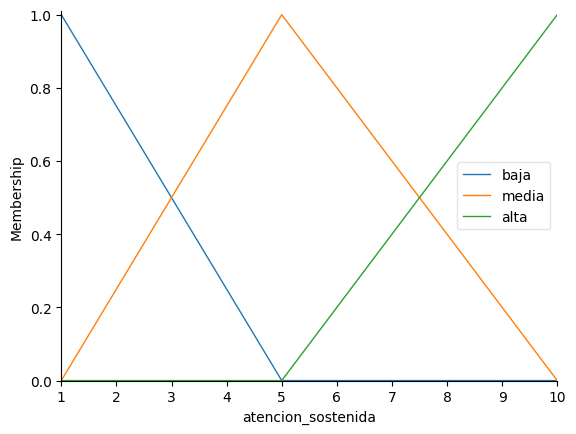

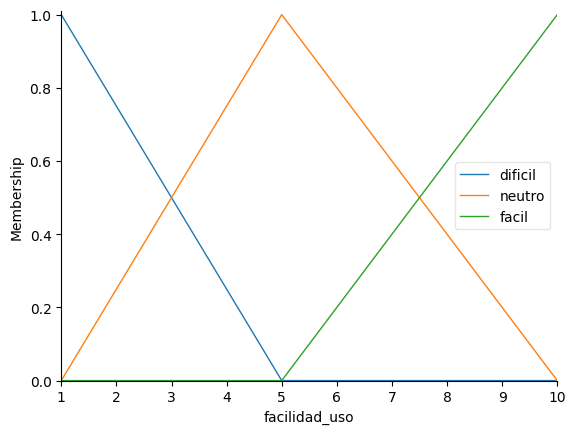

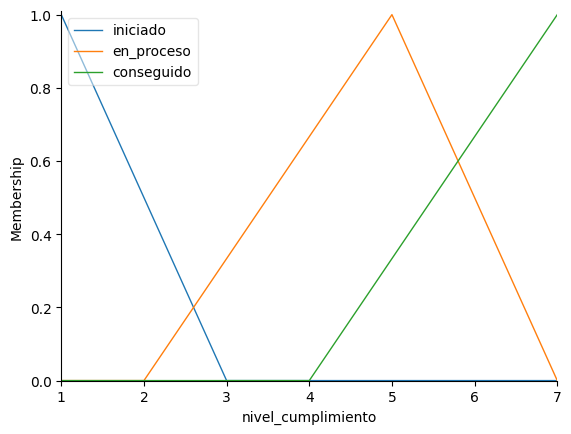

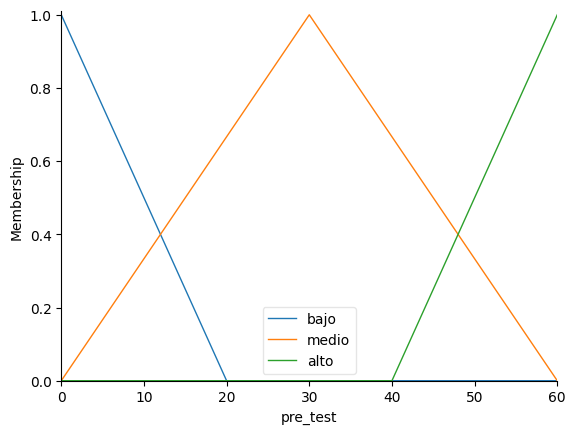

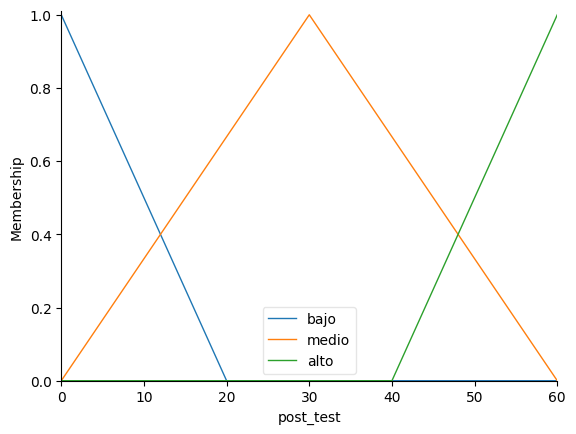

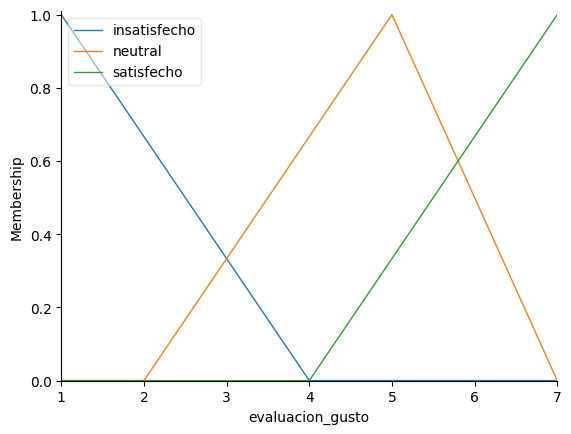

In [ ]:
import matplotlib.pyplot as plt

# Graficar las funciones de pertenencia de las variables de entrada
atencion_sostenida.view()
facilidad_uso.view()
nivel_cumplimiento.view()
pre_test.view()
post_test.view()
evaluacion_gusto.view()

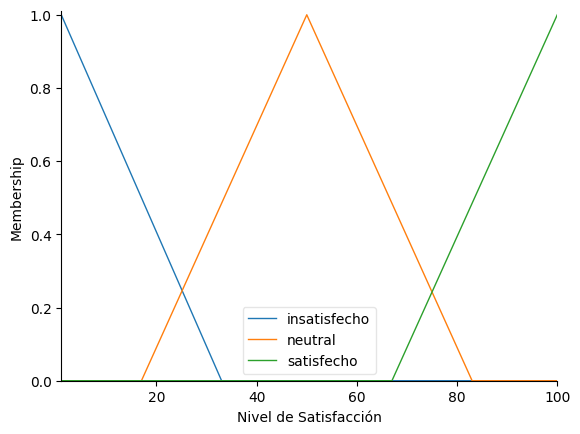

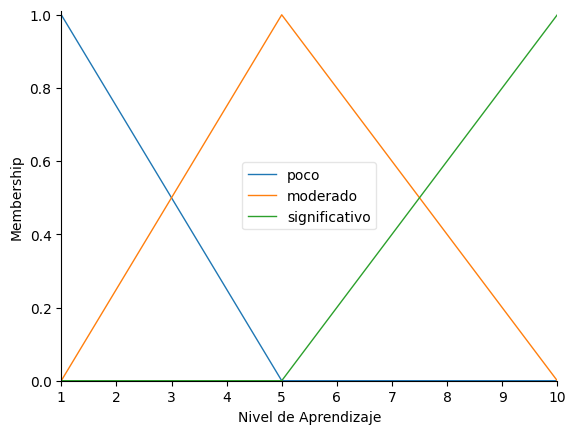

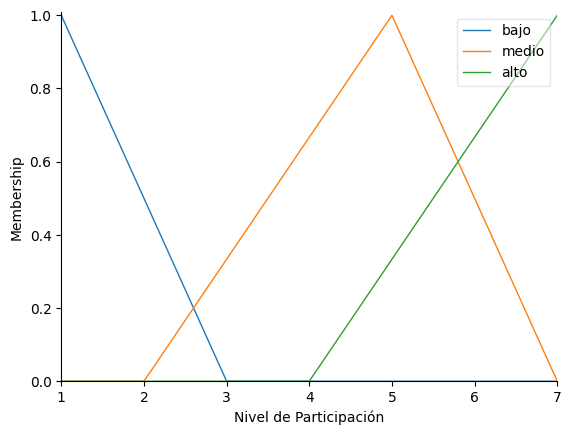

In [ ]:
# Graficar las funciones de pertenencia de las variables de salida
NS.view()
NA.view()
NP.view()

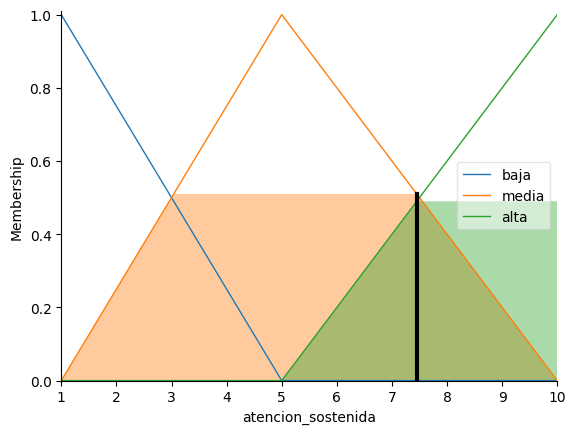

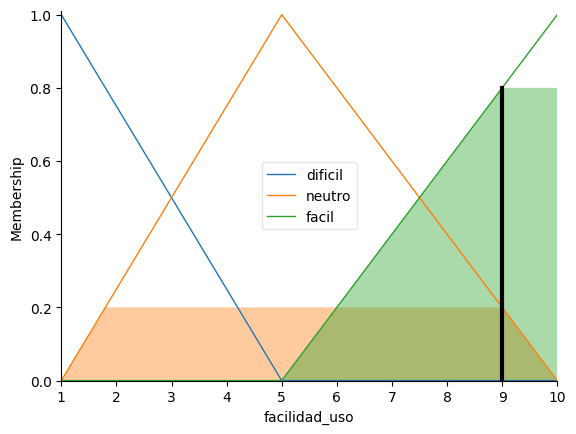

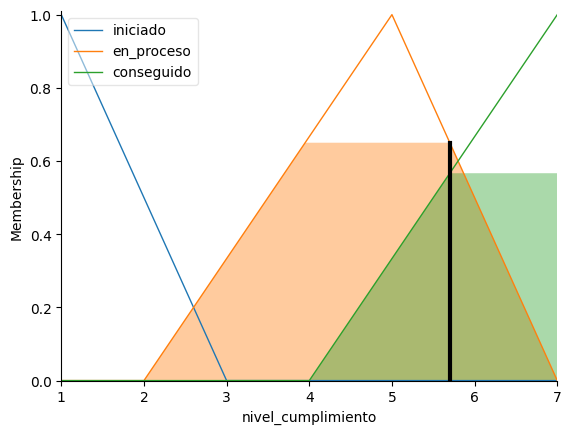

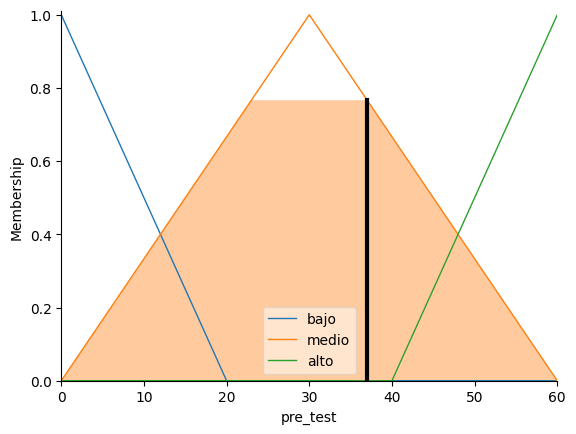

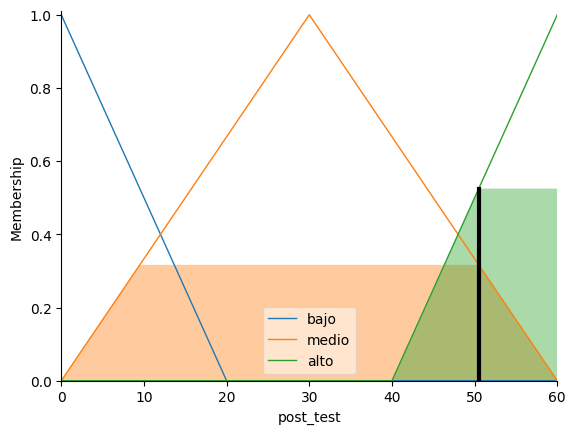

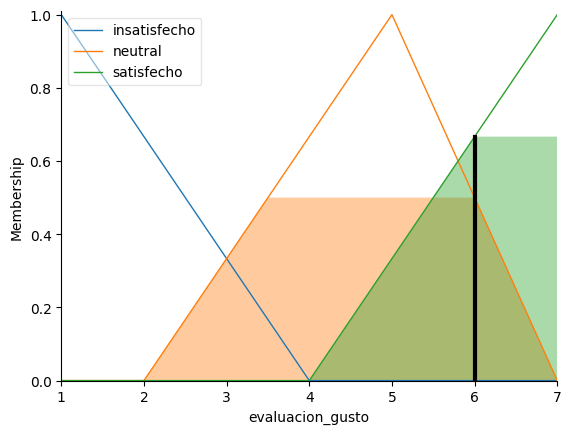

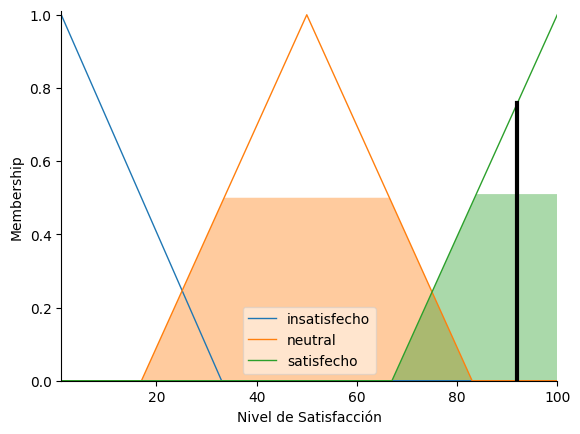

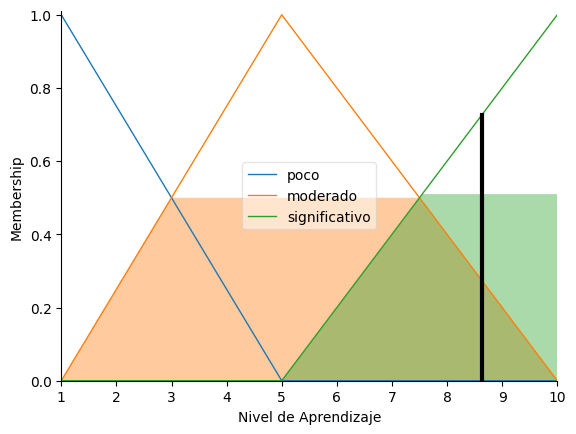

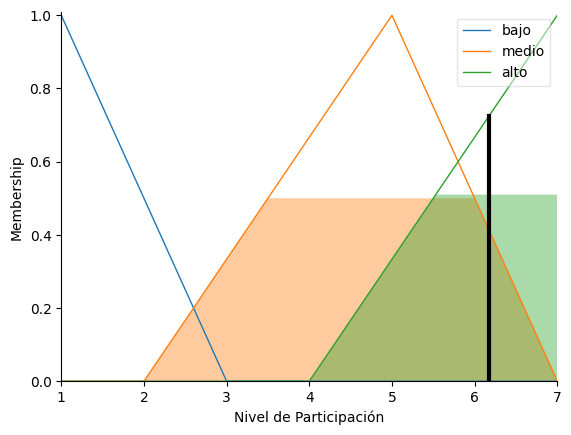

In [ ]:


# Ejecutar la simulación con los valores de entrada dados
sistema.input['atencion_sostenida'] = 7.45
sistema.input['facilidad_uso'] = 9
sistema.input['nivel_cumplimiento'] = 5.7
sistema.input['pre_test'] = 37
sistema.input['post_test'] = 50.5
sistema.input['evaluacion_gusto'] = 6

sistema.compute()

# Graficar los resultados de la simulación en las funciones de pertenencia
atencion_sostenida.view(sim=sistema)
facilidad_uso.view(sim=sistema)
nivel_cumplimiento.view(sim=sistema)
pre_test.view(sim=sistema)
post_test.view(sim=sistema)
evaluacion_gusto.view(sim=sistema)

NS.view(sim=sistema)
NA.view(sim=sistema)
NP.view(sim=sistema)


# Mostrar todas las gráficas
plt.show()
